In [103]:
import torch.nn
from datetime import datetime
import torchvision.models as models
import torch.nn.functional as F
import scipy.io
import torch
import numpy as np
from PIL import Image 
import os
from torch.optim.lr_scheduler import ReduceLROnPlateau


In [148]:
path = "D:\\Casper\\OTHER\\Data\\identification code_database\\train.mat"
path2 = "D:\\Casper\\OTHER\\Data\\identification code_database\\denoise_train2.mat"
def load_data(path_X, path_Y):
    data = scipy.io.loadmat(path_X) 
    print(data.keys())

    # origin_X = np.array(data['x'].flat)
    origin_X = np.array(data['denoise2_x'])
    data = scipy.io.loadmat(path_Y) 
    origin_Y = data['y'][0].reshape(5000,-1)
    origin_Y_onehot= data['y_onehot'].reshape(5000,4,19)
    
    print ("origin_X shape: "+str(origin_X.shape))
    print ("origin_Y shape: "+str(origin_Y.shape))
    print ("origin_Y_onehot shape: "+str(origin_Y_onehot.shape))
 
    return origin_X,origin_Y,origin_Y_onehot

In [3]:
def resize_img (o_data,write,save):  
    index=0
    p_data=[]
    for i in o_data:
        name='resize_data_image/resize_x_'+str(index)+'.jpg'
        img = Image.fromarray(i, 'RGB')
        img=img.resize((130,50))
        if os.path.isfile(name) and save:      
            print (name+" is existed")    
        elif save:
            img.save(name)
        if write:
            p_data.append(np.array(img))       
        index+=1
        
    p_data=np.array(p_data)   
    print (p_data.shape)
    return p_data

In [171]:
origin_X,origin_Y,origin_Y_onehot=load_data(path2, path)

train_rate=0.5 #change to 0.9
num_train_data=int(5000*train_rate)
print(origin_X.shape)
# resize_x= resize_img(origin_X,True,False)
resize_x= origin_X
train_x_orig=resize_x.reshape(5000,50,130,-1)[0:num_train_data]
test_x_orig=resize_x.reshape(5000,50,130,-1)[num_train_data:]

x_train=train_x_orig.astype('float32')/255
x_test=test_x_orig.astype('float32')/255

y_train_onehot=origin_Y_onehot[0:num_train_data]
y_test_onehot=origin_Y_onehot[num_train_data:]

dict_keys(['__header__', '__version__', '__globals__', 'denoise2_x'])
origin_X shape: (5000, 50, 130)
origin_Y shape: (5000, 4)
origin_Y_onehot shape: (5000, 4, 19)
(5000, 50, 130)


In [172]:
origin_X_tensor = torch.tensor(x_train, dtype=torch.float32)
origin_Y_tensor = torch.tensor(y_train_onehot, dtype=torch.float32)
origin_Y_onehot_tensor = torch.tensor(y_train_onehot, dtype=torch.float32)

torch.Size([50, 130, 1])
torch.Size([50, 130, 1])


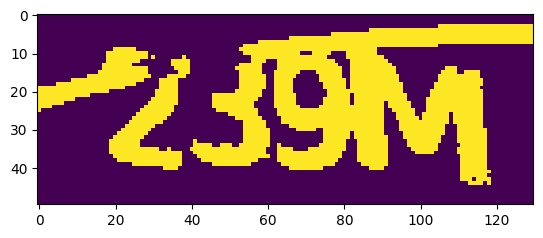

In [173]:
import matplotlib.pyplot as plt
print(origin_X_tensor[0].shape)
tensor = origin_X_tensor[0].permute(2, 0, 1)
tensor = tensor.permute(1, 2, 0)
print(tensor.shape)
# if tensor.min() < 0 or tensor.max() > 1:
    # tensor = (tensor - tensor.min()) / (tensor.max() - tensor.min())

plt.imshow(tensor)

# print(origin_Y_onehot_tensor[0])

In [174]:
# from torchvision import datasets, transforms

# transform = transforms.Compose([transforms.ToTensor(),
#                                     transforms.Normalize((0.5,), (0.5,))])
# train_loader = torch.utils.data.DataLoader(origin_X_tensor, batch_size=256, shuffle=True)
# test_loader = torch.utils.data.DataLoader(origin_Y_onehot_tensor, batch_size=256, shuffle=True)


In [175]:
origin_X_tensor_permuted = origin_X_tensor.permute(0, 3, 1, 2)


In [176]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class SimpleCharCNN(nn.Module):
    def __init__(self):
        super(SimpleCharCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=5, padding=2)  # Assuming grayscale images
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.fc1 = nn.Linear(24576, 512)  # Adjust the size according to your image size
        self.fc2 = nn.Linear(512, 76)  # 4 characters, each 26 possible letters

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [177]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCharCNN(nn.Module):
    def __init__(self):
        super(SimpleCharCNN, self).__init__()
        
        # Convolutional layers
        self.conv11_W1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=5, stride=1, padding='same')
        self.conv12_W1 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1)
        self.max_pool1_W1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv23_W1 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding='same')
        self.conv24_W1 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1)
        self.conv25_W1 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1)
        self.bn1_W1 = nn.BatchNorm2d(128)
        self.max_pool2_W1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv36_W1 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=1, stride=1, padding='same')
        self.conv37_W1 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1)
        self.conv38_W1 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1)
        self.max_pool3_W1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv49_W1 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding='same')
        self.conv410_W1 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=1, stride=1)
        self.bn2_W1 = nn.BatchNorm2d(512)
        self.max_pool4_W1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(0.5)
        
        # Dense (Fully Connected) Layers for each output branch
        self.fc_branches = nn.ModuleList([
            nn.Sequential(
                nn.Linear(in_features=3072, out_features=128),
                nn.ReLU(),
                nn.Dropout(0.25),
                nn.Linear(in_features=128, out_features=128),
                nn.ReLU(),
                nn.Linear(in_features=128, out_features=19),
                nn.Softmax(dim=1)
            ) for _ in range(4)
        ])

    def forward(self, x):
        x = F.relu(self.conv11_W1(x))
        x = F.relu(self.conv12_W1(x))
        x = self.max_pool1_W1(x)
        
        x = F.relu(self.conv23_W1(x))
        x = F.relu(self.conv24_W1(x))
        x = F.relu(self.conv25_W1(x))
        x = self.bn1_W1(x)
        x = self.max_pool2_W1(x)
        
        x = F.relu(self.conv36_W1(x))
        x = F.relu(self.conv37_W1(x))
        x = F.relu(self.conv38_W1(x))
        x = self.max_pool3_W1(x)
        
        x = F.relu(self.conv49_W1(x))
        x = F.relu(self.conv410_W1(x))
        x = self.bn2_W1(x)
        x = self.max_pool4_W1(x)
        
        x = self.flatten(x)
        x = self.dropout(x)
        
        # Branch out to the four different dense layers
        outputs = torch.stack([branch(x) for branch in self.fc_branches], dim = 1)
        
        return outputs

In [180]:
train_X = origin_X_tensor_permuted
train_Y = origin_Y_onehot_tensor.reshape(2500,-1)
print(train_X.shape)
print(train_Y.shape)

torch.Size([2500, 1, 50, 130])
torch.Size([2500, 76])


In [181]:
# Split your data into training and validation sets
# For demonstration, let's assume origin_X_tensor and origin_Y_onehot_tensor are available
# and split manually for simplicity. Consider using `torch.utils.data.Dataset` and `DataLoader` for better handling.
from tqdm import tqdm
# num_train = int(0.8 * len(origin_X_tensor))  # 80% for training



def train(model, epochs, batch_size, reshape=False):
    # criterion = nn.BCEWithLogitsLoss()  # Suitable for multi-label classification
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.8, patience=5, verbose=True, min_lr=0)
    correct_predictions = 0
    total_samples = 0

    train_Y_reshaped = train_Y.reshape(2500, 4, -1)
    _, label = torch.max(train_Y_reshaped, 1)

    model = model.cuda()
    for epoch in range(epochs):
        correct_predictions = 0
        total_samples = 0
        running_loss = 0.0
        model.train()

        for i in tqdm(range(0, len(train_X), batch_size)):
            optimizer.zero_grad()

            # Create a batch
            batch_X = train_X[i:i+batch_size]
            batch_Y = train_Y_reshaped[i:i+batch_size]
            batch_labels = label[i:i+batch_size]
            batch_X, batch_Y, batch_labels = batch_X.cuda(), batch_Y.cuda(), batch_labels.cuda()

            # Forward pass
            output = model(batch_X)
            # print(output.shape)
            # print(batch_Y.shape)
            loss = criterion(output, batch_Y)

            # Backward and optimize
            loss.backward()
            running_loss += loss.item()
            optimizer.step()
            # Calculate accuracy
            if reshape:
                output_reshaped = output.reshape(batch_Y.shape[0], 19, -1)
            else:
                output_reshaped = output
            _, predicted = torch.max(output_reshaped, 1)
            # print(predicted.shape)
            # print(batch_labels.shape)
            correct_predictions += (predicted == batch_labels).sum().item()
            total_samples += batch_labels.size(0) * 19
        scheduler.step(running_loss)

        # Compute accuracy over all batches
        top1_accuracy = correct_predictions / total_samples * 100
        print(f"Epoch {epoch+1}, Loss: {loss.item()}, Accuracy: {top1_accuracy:.2f}%")


In [182]:
model = SimpleCharCNN()
train(model, 50, 32)

  0%|          | 0/79 [00:00<?, ?it/s]

100%|██████████| 79/79 [00:01<00:00, 52.49it/s]


Epoch 1, Loss: 0.2839244306087494, Accuracy: 24.45%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 2, Loss: 0.26371631026268005, Accuracy: 28.03%


100%|██████████| 79/79 [00:01<00:00, 64.03it/s]


Epoch 3, Loss: 0.2542389929294586, Accuracy: 26.87%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 4, Loss: 0.262136310338974, Accuracy: 25.44%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 5, Loss: 0.2470652461051941, Accuracy: 30.71%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 6, Loss: 0.24263417720794678, Accuracy: 29.92%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 7, Loss: 0.25369828939437866, Accuracy: 29.05%


100%|██████████| 79/79 [00:01<00:00, 64.25it/s]


Epoch 8, Loss: 0.24103280901908875, Accuracy: 28.64%


100%|██████████| 79/79 [00:01<00:00, 64.25it/s]


Epoch 9, Loss: 0.2357170730829239, Accuracy: 29.23%


100%|██████████| 79/79 [00:01<00:00, 64.78it/s]


Epoch 10, Loss: 0.2204730361700058, Accuracy: 28.50%


100%|██████████| 79/79 [00:01<00:00, 64.25it/s]


Epoch 11, Loss: 0.21473334729671478, Accuracy: 29.12%


100%|██████████| 79/79 [00:01<00:00, 64.25it/s]


Epoch 12, Loss: 0.21340876817703247, Accuracy: 29.01%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 13, Loss: 0.2128426879644394, Accuracy: 28.68%


100%|██████████| 79/79 [00:01<00:00, 62.72it/s]


Epoch 14, Loss: 0.20878271758556366, Accuracy: 28.98%


100%|██████████| 79/79 [00:01<00:00, 63.81it/s]


Epoch 15, Loss: 0.2110184133052826, Accuracy: 28.65%


100%|██████████| 79/79 [00:01<00:00, 62.27it/s]


Epoch 16, Loss: 0.1919773817062378, Accuracy: 29.65%


100%|██████████| 79/79 [00:01<00:00, 61.74it/s]


Epoch 17, Loss: 0.2263331115245819, Accuracy: 30.16%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 18, Loss: 0.2008209377527237, Accuracy: 31.24%


100%|██████████| 79/79 [00:01<00:00, 63.83it/s]


Epoch 19, Loss: 0.19143858551979065, Accuracy: 30.96%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 20, Loss: 0.2043992429971695, Accuracy: 32.33%


100%|██████████| 79/79 [00:01<00:00, 64.25it/s]


Epoch 21, Loss: 0.19442328810691833, Accuracy: 32.36%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 22, Loss: 0.19640672206878662, Accuracy: 33.24%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 23, Loss: 0.19460567831993103, Accuracy: 33.30%


100%|██████████| 79/79 [00:01<00:00, 63.22it/s]


Epoch 24, Loss: 0.194345623254776, Accuracy: 33.36%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 25, Loss: 0.19492670893669128, Accuracy: 32.27%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 26, Loss: 0.18896743655204773, Accuracy: 33.29%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 27, Loss: 0.19631877541542053, Accuracy: 32.80%


100%|██████████| 79/79 [00:01<00:00, 64.25it/s]


Epoch 28, Loss: 0.1974382847547531, Accuracy: 31.91%


100%|██████████| 79/79 [00:01<00:00, 64.25it/s]


Epoch 29, Loss: 0.18897561728954315, Accuracy: 32.53%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 30, Loss: 0.1939459592103958, Accuracy: 32.43%


100%|██████████| 79/79 [00:01<00:00, 64.25it/s]


Epoch 31, Loss: 0.19742704927921295, Accuracy: 33.94%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 32, Loss: 0.20584596693515778, Accuracy: 34.45%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 33, Loss: 0.20025993883609772, Accuracy: 34.97%


100%|██████████| 79/79 [00:01<00:00, 64.25it/s]


Epoch 34, Loss: 0.19838501513004303, Accuracy: 33.82%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 35, Loss: 0.20476287603378296, Accuracy: 34.45%


100%|██████████| 79/79 [00:01<00:00, 64.25it/s]


Epoch 36, Loss: 0.2014731913805008, Accuracy: 34.01%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 37, Loss: 0.18896712362766266, Accuracy: 35.73%


100%|██████████| 79/79 [00:01<00:00, 64.25it/s]


Epoch 38, Loss: 0.19958214461803436, Accuracy: 36.41%


100%|██████████| 79/79 [00:01<00:00, 64.25it/s]


Epoch 39, Loss: 0.196241557598114, Accuracy: 36.51%


100%|██████████| 79/79 [00:01<00:00, 64.78it/s]


Epoch 40, Loss: 0.18896712362766266, Accuracy: 36.15%


100%|██████████| 79/79 [00:01<00:00, 64.25it/s]


Epoch 41, Loss: 0.18896712362766266, Accuracy: 36.68%


100%|██████████| 79/79 [00:01<00:00, 64.25it/s]


Epoch 42, Loss: 0.1891285926103592, Accuracy: 36.18%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 43, Loss: 0.18896718323230743, Accuracy: 36.32%


100%|██████████| 79/79 [00:01<00:00, 64.78it/s]


Epoch 44, Loss: 0.18896712362766266, Accuracy: 37.71%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 45, Loss: 0.18896880745887756, Accuracy: 36.96%


100%|██████████| 79/79 [00:01<00:00, 64.77it/s]


Epoch 46, Loss: 0.18896745145320892, Accuracy: 37.15%


100%|██████████| 79/79 [00:01<00:00, 63.73it/s]


Epoch 47, Loss: 0.18896712362766266, Accuracy: 37.76%


100%|██████████| 79/79 [00:01<00:00, 63.62it/s]


Epoch 48, Loss: 0.18903577327728271, Accuracy: 38.76%


100%|██████████| 79/79 [00:01<00:00, 64.25it/s]


Epoch 49, Loss: 0.18896712362766266, Accuracy: 38.50%


100%|██████████| 79/79 [00:01<00:00, 64.25it/s]

Epoch 50, Loss: 0.18896716833114624, Accuracy: 39.08%


In [187]:
from torchvision import models

model = models.resnet152(weights = models.ResNet152_Weights.DEFAULT)
# print(model)
num_channel = model.conv1.in_channels
model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
num_features = model.fc.in_features
model.fc = torch.nn.Linear(num_features, 76)
# print(num_features)
train(model, 50, 32, True)

  0%|          | 0/79 [00:00<?, ?it/s]


RuntimeError: 0D or 1D target tensor expected, multi-target not supported

In [ ]:
model = SimpleCharCNN()
train(model)

torch.Size([1, 4, 19])


  0%|          | 0/79 [00:00<?, ?it/s]

100%|██████████| 79/79 [00:01<00:00, 42.67it/s]


Epoch 1, Loss: 0.2847995162010193, Accuracy: 114.73%


100%|██████████| 79/79 [00:01<00:00, 47.32it/s]


Epoch 2, Loss: 0.2775733172893524, Accuracy: 144.79%


100%|██████████| 79/79 [00:01<00:00, 47.32it/s]


Epoch 3, Loss: 0.2559804618358612, Accuracy: 136.62%


100%|██████████| 79/79 [00:01<00:00, 47.04it/s]


Epoch 4, Loss: 0.2573447525501251, Accuracy: 143.65%


 42%|████▏     | 33/79 [00:00<00:00, 46.49it/s]


KeyboardInterrupt: 

In [107]:
def train2(model, train_X, train_Y, epochs, batch_size):
    # Assuming `train_Y` is a list of tensors for each output, each with shape [num_samples, num_classes]
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.8, patience=5, verbose=True, cooldown=0, min_lr=0)

    model = model.cuda()

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_predictions = [0 for _ in range(len(train_Y))]
        total_samples = [0 for _ in range(len(train_Y))]

        for i in tqdm(range(0, len(train_X), batch_size)):
            batch_X = train_X[i:i+batch_size].cuda()

            # Forward pass
            outputs = model(batch_X)
            
            loss = 0
            for j, output in enumerate(outputs):  # Iterate through each set of model outputs
                batch_Y_j = train_Y[j][i:i+batch_size].cuda()
                loss += criterion(output, torch.max(batch_Y_j, 1)[1])  # Assuming one-hot encoded labels
                
                # For accuracy calculation
                _, predicted = torch.max(output, 1)
                correct_predictions[j] += (predicted == torch.max(batch_Y_j, 1)[1]).sum().item()
                total_samples[j] += batch_Y_j.size(0)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        scheduler.step(running_loss)

        # Compute and print accuracy for each output
        for j in range(len(correct_predictions)):
            accuracy = 100 * correct_predictions[j] / total_samples[j]
            print(f'Epoch {epoch+1}, Output {j+1}, Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%')


In [108]:

model = SimpleCharCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, 'min', factor=0.8, patience=5, verbose=True, min_lr=0)

# early_stopping = EarlyStopping(patience=15, verbose=True, path='model_checkpoint.pt')

NUM_EPOCHS = 50
BATCH_SIZE = 32
train2(model,train_X, train_Y, NUM_EPOCHS, BATCH_SIZE)


  0%|          | 0/79 [00:00<?, ?it/s]


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [102]:
def count_parameters(model):
    total_num = 0
    for parameter in model.parameters():
        if parameter.requires_grad:
            total_num += parameter.numel() 
    return total_num
count_parameters(model)

4848396

In [69]:
# print(one_hot_output)
output = output.reshape(2500, 19, -1)
train_Y = train_Y.reshape(2500, 19, -1)
_, label = torch.max(train_Y, 1)
_, predicted = torch.max(output, 1)
print(predicted.shape)
print(label.shape)
print(label)
print((predicted == label).sum().item())
# print(output)

torch.Size([2500, 4])
torch.Size([2500, 4])
tensor([[ 0,  0,  0, 10],
        [ 0,  5,  0,  0],
        [ 0,  0, 14, 10],
        ...,
        [ 5,  4, 18, 13],
        [ 2,  6,  0, 17],
        [ 6,  3,  0,  0]])
307


In [31]:

def load_data_torch(data_path):
    # Load the MATLAB file
    data = scipy.io.loadmat(data_path)
    print(data.keys())
    # print(data['y'].shape)
    # print(data['x'][0])
    origin_X = np.array(data['x'].flat)  # Example for uniform shape. Adjust based on actual data structure
    origin_Y = np.array(data['y'][0].reshape(5000, -1))
    origin_Y_onehot = np.array(data['y_onehot'].reshape(5000, 4, 19))
    print(origin_Y_onehot[0])

    

    print ("x_train shape: "+str(x_train.shape))
    print ("x_test shape: "+str(x_test.shape))

    y_train_onehot=origin_Y_onehot[0:num_train_data]
    y_test_onehot=origin_Y_onehot[num_train_data:]

    print ("y_train_onehot shape: "+str(y_train_onehot.shape))
    print ("y_test_onehot shape: "+str(y_test_onehot.shape))
    # Convert to PyTorch tensors
    origin_X_tensor = torch.tensor(origin_X, dtype=torch.float32)
    origin_Y_tensor = torch.tensor(origin_Y, dtype=torch.float32)
    origin_Y_onehot_tensor = torch.tensor(origin_Y_onehot, dtype=torch.float32)
    
    print("origin_X_tensor shape: "+str(origin_X_tensor.shape))
    print("origin_Y_tensor shape: "+str(origin_Y_tensor.shape))
    print("origin_Y_onehot_tensor shape: "+str(origin_Y_onehot_tensor.shape))

    return origin_X_tensor, origin_Y_tensor, origin_Y_onehot_tensor
    # return 0, 0, 0
origin_X, origin_Y, origin_Y_onehot = load_data_torch(path)


dict_keys(['__header__', '__version__', '__globals__', 'y_onehot', 'x', 'y'])
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [23]:
import torch
from torchvision import datasets, transforms

def load_original_data_pytorch(path):
    # Define a transform to normalize the data
    transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.5,), (0.5,))])
    
    # Download and load the training data
    trainset = datasets.MNIST(path, download=True, train=True, transform=transform)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True)

    # Download and load the test data
    testset = datasets.MNIST(path, download=True, train=False, transform=transform)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=256, shuffle=True)

    return train_loader, test_loader
path = 'D:\\Casper\\OTHER\\Data\\MNIST_data'
train_loader, test_loader = load_original_data_pytorch(path)
loaders = {
    'train': train_loader,
    'test': test_loader
}


In [10]:
def pprint(output = '\n', show_time = False): # print and fprint at the same time
    filename = "hw2-1.txt"
    print(output)
    with open(filename, 'a') as f:
        if show_time:
            f.write(datetime.now().strftime("[%Y-%m-%d %H:%M:%S] "))

        f.write(str(output))
        f.write('\n')
pprint("build function", True)

build function


In [11]:
def count_parameters(model):
    total_num = 0

    for parameter in model.parameters():
        if parameter.requires_grad:
            total_num += parameter.numel() 
    return total_num


In [27]:
import time
import torchvision.models as models
from torch import nn, optim
from tqdm import tqdm
def train(model, model_name):
    pprint(f"test {model_name}", True)
    model_parameters_amount = count_parameters(model)
    pprint(f"model total parameters: {model_parameters_amount:,}")

    model = model.cuda()
    criterion = nn.CrossEntropyLoss()
    lr= 0.005
    optimizer = optim.Adam(model.parameters(), lr=lr)
    pprint(f"learning rate={lr}")
    iteration = 0
    epochs = 20
    start = time.time()
    phases = ['train', 'test']
    for epoch in range(epochs):
        for phase in phases:
            running_loss = 0.0
            correct_predictions = 0
            correct_top3_predictions = 0
            total_samples = 0
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            for images, labels in tqdm(loaders[phase]): # Iterate over data.
                images, labels = images.cuda(), labels.cuda()
                outputs = model(images)
                loss = criterion(outputs, labels)

                with torch.set_grad_enabled(phase == 'train'):
                    if phase == 'train': # backward + optimize only if in training phase
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()
                running_loss += loss.item()

                # Convert outputs to predicted class by selecting the class with the highest score
                _, predicted = torch.max(outputs, 1)
                # Accumulate the number of correct predictions
                correct_predictions += (predicted == labels).sum().item()
                
                _, top3_preds = outputs.topk(3, 1, True, True)
                correct_top3_predictions += sum([labels[i] in top3_preds[i] for i in range(labels.size(0))])

                total_samples += labels.size(0)
                iteration += 1
                # if iteration % 20 == 0:
                #     print(iteration)
            avg_loss = running_loss / total_samples
            top1_accuracy = correct_predictions / total_samples * 100
            top3_accuracy = correct_top3_predictions / total_samples * 100
            pprint(f"Epoch [{epoch+1}/{epochs}], phase: {phase}, samples: {total_samples}, Loss: {avg_loss:.4f}, Top-1 Accuracy: {top1_accuracy:.2f}%, Top-3 Accuracy: {top3_accuracy:.2f}%")
    end = time.time()
    duration = end - start
    pprint(f"Elapsed time: {duration} seconds")
    model_scripted = torch.jit.script(model) # Export to TorchScript
    model_scripted.save(f'{model_name}.pt') # Save
    pprint(f"weight saved as: {model_name}.pt")   


In [25]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # First layer: 784 input features, 128 output features
        self.fc2 = nn.Linear(128, 64)   # Second layer: 128 input features, 64 output features
        self.fc3 = nn.Linear(64, 10)    # Final layer: 64 input features, 10 output features (digits 0-9)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the input tensor
        x = F.relu(self.fc1(x))  # Apply ReLU non-linearity after first layer
        x = F.relu(self.fc2(x))  # Apply ReLU non-linearity after second layer
        x = self.fc3(x)  # No non-linearity after final layer
        return F.log_softmax(x, dim=1)  # Apply log-softmax to output for classification


In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 64)  # The image size is reduced to 7x7 after pooling layers
        self.fc2 = nn.Linear(64, 10)  # 10 output classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Convolution -> ReLU -> Pooling
        x = self.pool(F.relu(self.conv2(x)))  # Convolution -> ReLU -> Pooling
        x = torch.flatten(x, 1)  # Flatten
        x = F.relu(self.fc1(x))  # Dense layer -> ReLU
        x = self.fc2(x)  # Output layer
        return F.log_softmax(x, dim=1)  # Log Softmax activation for the output


In [28]:
model_list = [
    SimpleNN(),
    SimpleCNN(),
]

model_name = [
    "SimpleNN",
    "SimpleCNN",
]
for ii in range(len(model_name)):
    train(model_list[ii], model_name[ii])

test SimpleNN
model total parameters: 109,386
learning rate=0.005


100%|██████████| 235/235 [00:12<00:00, 18.31it/s]


Epoch [1/20], phase: train, samples: 60000, Loss: 0.0017, Top-1 Accuracy: 86.47%, Top-3 Accuracy: 96.00%


100%|██████████| 40/40 [00:02<00:00, 19.57it/s]


Epoch [1/20], phase: test, samples: 10000, Loss: 0.0009, Top-1 Accuracy: 93.02%, Top-3 Accuracy: 99.05%


100%|██████████| 235/235 [00:12<00:00, 18.45it/s]


Epoch [2/20], phase: train, samples: 60000, Loss: 0.0007, Top-1 Accuracy: 94.18%, Top-3 Accuracy: 99.11%


100%|██████████| 40/40 [00:01<00:00, 21.86it/s]


Epoch [2/20], phase: test, samples: 10000, Loss: 0.0006, Top-1 Accuracy: 95.15%, Top-3 Accuracy: 99.45%


100%|██████████| 235/235 [00:12<00:00, 19.09it/s]


Epoch [3/20], phase: train, samples: 60000, Loss: 0.0006, Top-1 Accuracy: 95.53%, Top-3 Accuracy: 99.45%


100%|██████████| 40/40 [00:01<00:00, 20.42it/s]


Epoch [3/20], phase: test, samples: 10000, Loss: 0.0005, Top-1 Accuracy: 96.24%, Top-3 Accuracy: 99.53%


100%|██████████| 235/235 [00:12<00:00, 18.25it/s]


Epoch [4/20], phase: train, samples: 60000, Loss: 0.0005, Top-1 Accuracy: 96.42%, Top-3 Accuracy: 99.63%


100%|██████████| 40/40 [00:01<00:00, 20.69it/s]


Epoch [4/20], phase: test, samples: 10000, Loss: 0.0006, Top-1 Accuracy: 95.94%, Top-3 Accuracy: 99.44%


100%|██████████| 235/235 [00:12<00:00, 18.10it/s]


Epoch [5/20], phase: train, samples: 60000, Loss: 0.0004, Top-1 Accuracy: 96.60%, Top-3 Accuracy: 99.62%


100%|██████████| 40/40 [00:02<00:00, 19.94it/s]


Epoch [5/20], phase: test, samples: 10000, Loss: 0.0006, Top-1 Accuracy: 95.55%, Top-3 Accuracy: 99.31%


100%|██████████| 235/235 [00:13<00:00, 17.93it/s]


Epoch [6/20], phase: train, samples: 60000, Loss: 0.0004, Top-1 Accuracy: 97.05%, Top-3 Accuracy: 99.72%


100%|██████████| 40/40 [00:01<00:00, 21.86it/s]


Epoch [6/20], phase: test, samples: 10000, Loss: 0.0004, Top-1 Accuracy: 96.72%, Top-3 Accuracy: 99.58%


 70%|███████   | 165/235 [00:09<00:04, 17.37it/s]


KeyboardInterrupt: 